<a href="https://colab.research.google.com/github/paulf35/cd-ds-productsalespredictions/blob/main/Paul_Foy_Core_ProductSalesPredictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction of Product Sales
Author: Paul Foy


## Project Overview
Your task is to use Pandas to load in the data and start exploring and cleaning it. As data scientists, about 80% of our time is spent on data preparation - so this is a very important step!

- Download the data using this link: download the data. (Note: Original data source).
- Insert code below the heading "Loading Data"
  - Use Pandas to read the sales prediction data set into Google Colab.
  - Use df.info() and df.head() methods to preview the first rows of your data and a summary of your DataFrame's columns.
- Insert code below the heading "Data Cleaning"
  - Explore the data - what do you need to do to clean this data? Clean it!

Be sure to address each of the following tasks:

1) How many rows and columns?

2) What are the datatypes of each variable?

3) Are there duplicates? If so, drop any duplicates.

4) Identify missing values.

5) Address the missing values by using a placeholder value.

6) Confirm that there are no missing values after addressing them.

7) Find and fix any inconsistent categories of data (for example: fix cat, Cat, and cats so that they are consistent).

8) For any numerical columns, obtain the summary statistics of each (min, max, mean).




## Load and Inspect Data

Load in required packages and import sales data from Google Drive

In [470]:
#Importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Warnings
import warnings


## Warnings

In [471]:
## Set filter warnings to ignore
warnings.filterwarnings('ignore')

##Pandas Display Configurations

In [472]:
## Display all columns
pd.set_option('display.max_column', None)

##Set MatPlotLib rcParams

In [473]:
## Set MatPlotLib default parameters
plt.rcParams.update({'figure.facecolor': 'white',
                          'font.weight': 'bold',
                      'patch.linewidth': 1.25,
                       'axes.facecolor': 'white',
                       'axes.edgecolor': 'black',
                       'axes.linewidth': 2,
                       'axes.titlesize': 8,
                     'axes.titleweight': 'bold',
                       'axes.labelsize': 8,
                     'axes.labelweight': 'bold',
                      'xtick.labelsize': 8,
                      'ytick.labelsize': 8,
                            'axes.grid': True,
                       'axes.grid.axis': 'y',
                           'grid.color': 'black',
                       'grid.linewidth': .5,
                           'grid.alpha': .25,
                   'scatter.edgecolors': 'black'})

##Load the data

In [474]:
# Load Sales data in from Google Drive
fname = "/content/drive/MyDrive/CodingDojo/01-Fundamentals/Week02/Data/sales_predictions_2023.csv"
df_psales = pd.read_csv(fname)

## Inspect Data

Provide summary of data using .info() and .head() methods.

In [475]:
# Preview first 5 rows of data
df_psales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [476]:
# Get info data for data set
df_psales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


## Clean Data
Explore the existing data and begin cleaning.

### Q1: How many rows and columns are there?

- There are 8523 rows and 12 columns.

In [477]:
## Display the number of rows and columns for the dataframe
df_psales.shape

(8523, 12)

In [478]:
## Display the number of rows and columns for the dataframe
## Using a print() and an F-string:
## 'There are x rows, and x columns.'
print(f'There are {df_psales.shape[0]} rows and {df_psales.shape[1]} columns.')

There are 8523 rows and 12 columns.


###Q2: What are the data types for each variable


In [479]:
# Use Dtypes to display the data type of each variable/column
# Display the column names and datatypes for each column
# Columns with mixed datatypes are identified as an object datatype
print(df_psales.dtypes)

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object


In [480]:
## Display the descriptive statistics for the numerical columns
## Using include="number"
df_psales.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


###Q3: Are there any duplicates? If so, drop any duplicates
- There are no duplicated rows in the original data set.

In [481]:
#Run Duplicated()
df_psales.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Length: 8523, dtype: bool

In [482]:
## Display the number of duplicate rows in the dataset
print(f'There are {df_psales.duplicated().sum()} duplicate rows.')

There are 0 duplicate rows.


### [REMOVED] Q3: Are their missing values in the original data set?
- Yes. Item_Wight and Outlet_size columns both had missing values. I replaced numeric missing values with the value -1. I also replaced the missing object values with the string "MISSING".


In [483]:
# Get the number of null values for all columns and save as a variable
#df_psales_null = df_psales.isna().sum()

# Verify null values in df_psales_null
#print(df_psales_null)

In [484]:
# Calculate the percentage of null values for each column.
#print(df_psales_null/ len(df_psales) * 100)

[Removed] Commenting out to add back missing values.

Find and replace missing data with placeholder values.

In [485]:
# Find and replace missing numeric values with placeholer value (-1)
##num_placeholder = -1
##df_psales['Item_Weight'].fillna(value=num_placeholder, inplace=True)

# Find and replace missing object values with placeholer value ('MISSING')
##obj_placeholder = 'MISSING'
##df_psales['Outlet_Size'].fillna(value=obj_placeholder, inplace=True)

# Confirm no more nulls using Pandas
# Display the total number of missing values
##print(f'There are {df_psales.isna().sum().sum()} missing values.')

### Q7: Are there inconsistent cateogories of data. If so, fix them.
Inconsistencies found and fixed:
- Item_Fat_Content
  - "LF" and "low fat" changed to "Low Fat"
  - "reg" changed to "Regular"
- Outlet_Size
  - "High" changed to "Large"

In [486]:
for col in df_psales:
  print(f'Count for {col} is: \n{df_psales[col].value_counts()}\n')

Count for Item_Identifier is: 
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

Count for Item_Weight is: 
12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
7.275      2
7.685      1
9.420      1
6.520      1
5.400      1
Name: Item_Weight, Length: 415, dtype: int64

Count for Item_Fat_Content is: 
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Count for Item_Visibility is: 
0.000000    526
0.076975      3
0.162462      2
0.076841      2
0.073562      2
           ... 
0.013957      1
0.110460      1
0.124646      1
0.054142      1
0.044878      1
Name: Item_Visibility, Length: 7880, dtype: int64

Count for Item_Type is: 
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy            

In [487]:
# Fix inconsistencies in Item_Fat_Content
#Display the value counts from the column
df_psales['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [488]:
# Use a Dictionary to replace values
df_psales.replace({'low fat': 'Low Fat', 'reg':'Regular','LF':'Low Fat', 'High':'Large'}, inplace = True)

In [489]:
#Display the value counts from the column
print(df_psales['Item_Fat_Content'].value_counts())

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64


In [490]:
#Display the value counts from Outlet_Size
print(df_psales['Outlet_Size'].value_counts())

Medium    2793
Small     2388
Large      932
Name: Outlet_Size, dtype: int64


###Q8: For all numerical columns, list the summary statistics for each one.

In [491]:
# Save a list of object columns (Hint: select_dtypes)
num_cols = df_psales.select_dtypes('number').columns
num_cols

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

In [492]:
# Check the nunique for just the object cols
df_psales[num_cols].nunique()

Item_Weight                   415
Item_Visibility              7880
Item_MRP                     5938
Outlet_Establishment_Year       9
Item_Outlet_Sales            3493
dtype: int64

Display a summary for all numerical columns in the data set:

In [493]:
# loop through the list of pbject columns
# print the value counts for the column
# Print an empty line for readability

for col in num_cols:
  print(f'Summary for {col} is: \n{df_psales[col].describe()}\n')

Summary for Item_Weight is: 
count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

Summary for Item_Visibility is: 
count    8523.000000
mean        0.066132
std         0.051598
min         0.000000
25%         0.026989
50%         0.053931
75%         0.094585
max         0.328391
Name: Item_Visibility, dtype: float64

Summary for Item_MRP is: 
count    8523.000000
mean      140.992782
std        62.275067
min        31.290000
25%        93.826500
50%       143.012800
75%       185.643700
max       266.888400
Name: Item_MRP, dtype: float64

Summary for Outlet_Establishment_Year is: 
count    8523.000000
mean     1997.831867
std         8.371760
min      1985.000000
25%      1987.000000
50%      1999.000000
75%      2004.000000
max      2009.000000
Name: Outlet_Establishment_Year, dtype: float64

Summary for Item_Outlet_Sales is: 
count  

## Exploratory Data Analysis
In this section, your task is to complete any statistical analyses that might help you understand, explain, or model with your data. This must include at least one of each:

- Histograms to view the distributions of numerical features in your dataset.
- Boxplots to view statistical summaries of numerical features in your dataset.
- Countplots to view the frequency of each class of categorial features in your dataset.
- Heatmap to view the correlation between features.

### Numberical Columns

In [494]:
## Display the descriptive statistics for the numeric columns
df_psales.describe(exclude=('object'))

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


### Distribution of item weight and item visibility values

**Distribution of "Item Visibility"**


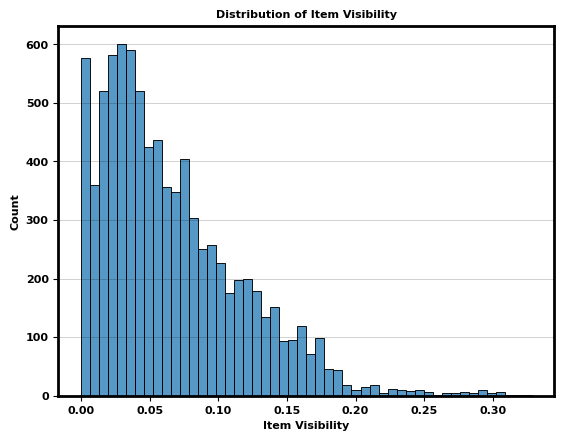

In [495]:
# Create historgram for Item_Visibility
ax = sns.histplot(data=df_psales, x='Item_Visibility')

# Adding titles and labels
ax.set_title('Distribution of Item Visibility')
ax.set_xlabel('Item Visibility')
ax.set_ylabel('Count');

**Distribution of Item Visibility as a boxplot**

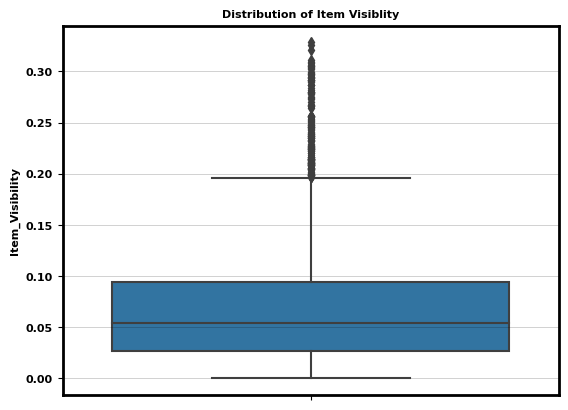

In [496]:
# Create boxplot of visibility
ax = sns.boxplot(data = df_psales, y = 'Item_Visibility')

## Set the Title
ax.set_title('Distribution of Item Visiblity');

Findings:
- Item visibility data is concentrated between 0 and .1.
- The data is right-skewed.

**Distribution of item weight**


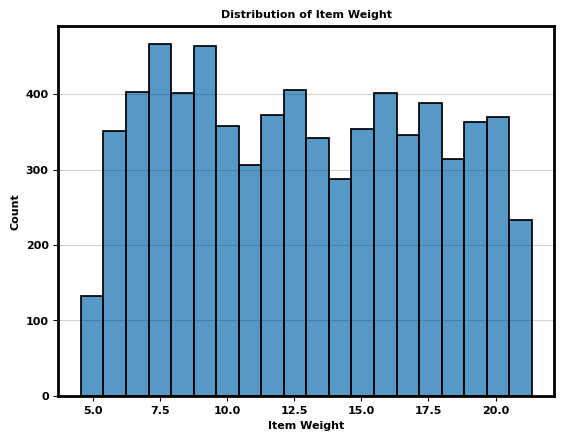

In [497]:
# Create historgram for 'Item_Weight'
ax = sns.histplot(data=df_psales, x='Item_Weight')

## Set the Title
ax.set_title('Distribution of Item Weight')
## Set the X axis label
ax.set_xlabel('Item Weight')
## Set the Y axis label
ax.set_ylabel('Count');



**Distribution of Item Weight as a boxplot**


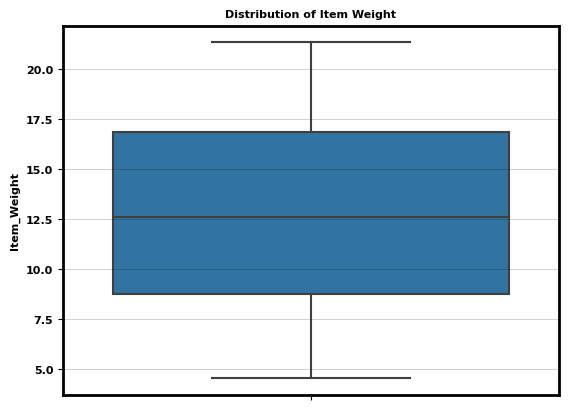

In [498]:
# Create boxplot of item weight
ax = sns.boxplot(data = df_psales, y = 'Item_Weight')

## Set the Title
ax.set_title('Distribution of Item Weight');

**Findings:**
- Item weight is left-skewed
- For item weights greater than 5, the items are pretty evenly distributed.

Get counts for each item type

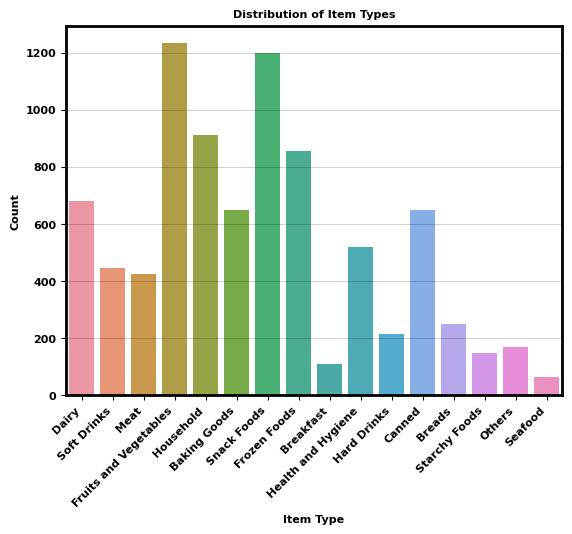

In [499]:
ax = sns.countplot(data=df_psales, x='Item_Type')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');
## Set the Title
ax.set_title('Distribution of Item Types')
## Set the X axis label
ax.set_xlabel('Item Type')
## Set the Y axis label
ax.set_ylabel('Count');

Findings:
- Fruits and Vegetables has the higest count
- Seafood has the lowest count

**Compare item weight summarizations across all item types**




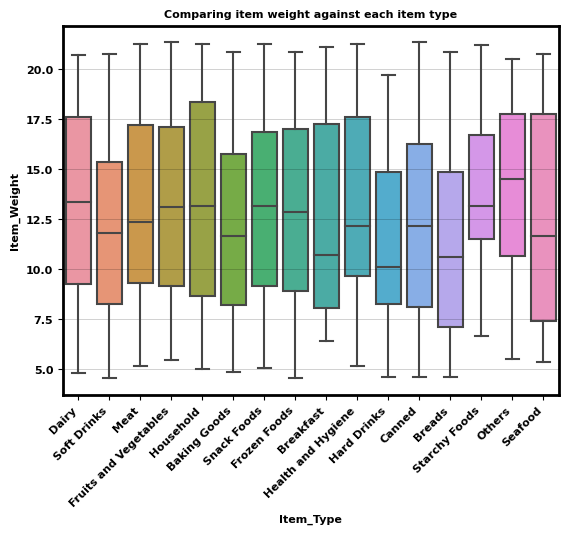

In [500]:
# Comparing item weight summaries for each item type
ax = sns.boxplot(data=df_psales, x='Item_Type', y="Item_Weight")
ax.set_title("Comparing item weight against each item type")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');

**Findings:**
- Average weights across items types are similar

##Correlation Data


In [501]:
# Get correlations
corr = df_psales.corr(numeric_only = True)
corr.round(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.00,-0.01,0.03,-0.01,0.01
Item_Visibility,-0.01,1.00,-0.00,-0.07,-0.13
Item_MRP,0.03,-0.00,1.00,0.01,0.57
Outlet_Establishment_Year,-0.01,-0.07,0.01,1.00,-0.05
Item_Outlet_Sales,0.01,-0.13,0.57,-0.05,1.00


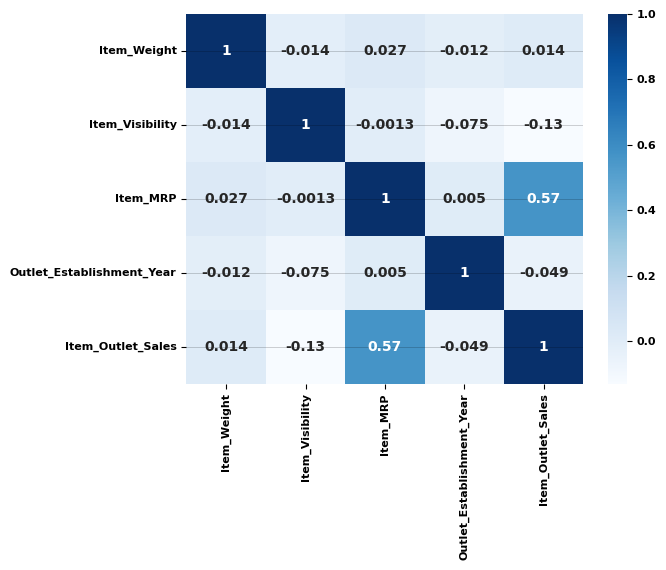

In [502]:
# Make a heatmap of the correlations
sns.heatmap(corr, cmap = 'Blues', annot=True);

**Findings:**
- There are no strong correlations between any of the numerical values.
- The strongest positive correlation is between Item_MRP and Item_Outlet_Sales at .57
- There are no negative correlations.

## Explanatory Data Analysis

Confirm placeholder values are removed and returned as null values.

In [503]:
print(f'There are {df_psales.isna().sum().sum()} missing values.')

There are 3873 missing values.


## Create Univariate Functions

###Univariate Categorical Function

In [504]:
# Create new function for univariate explorations
# Source: Week 4, lecture 2 code along

def explore_categorical(df_psales, x, fillna = True, placeholder = 'MISSING',
                        figsize = (10,8), order = None):
  """Creates a seaborn countplot with the option to temporarily fill missing values
  Prints statements about null values, cardinality, and checks for
  constant/quasi-constant features.
  Source:https://colab.research.google.com/drive/1t6w2YxqLr4h8jN7ITMlaQ38kybYDLT7d?usp=share_link#scrollTo=9p3hToMmmCce
  """
  # Make a copy of the dataframe and fillna
  temp_df = df_psales.copy()
  # Before filling nulls, save null value counts and percent for printing
  null_count = temp_df[x].isna().sum()
  null_perc = null_count/len(temp_df)* 100
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)
  # Create figure with desired figsize
  fig, ax = plt.subplots(figsize=figsize)
  # Plotting a count plot
  sns.countplot(data=temp_df, x=x, ax=ax, order=order)
  # Rotate Tick Labels for long names
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
  # Add a title with the feature name included
  ax.set_title(f"Column: {x}", fontweight='bold')

  # Fix layout and show plot (before print statements)
  fig.tight_layout()
  plt.show()

  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = temp_df[x].nunique()
  print(f"- Unique Values: {nunique}")

  # First find value counts of feature
  val_counts = temp_df[x].value_counts(dropna=False)
  # Define the most common value
  most_common_val = val_counts.index[0]
  # Define the frequency of the most common value
  freq = val_counts.values[0]
  # Calculate the percentage of the most common value
  perc_most_common = freq / len(temp_df) * 100

  # Print the results
  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")
  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, ax

###Explore Univariate Numerical Function

In [505]:
def explore_numeric(df_psales, x, figsize=(6,5) ):
  """Creates a seaborn histplot and boxplot with a share x-axis,
  Prints statements about null values, cardinality, and checks for
  constant/quasi-constant features.
  Source:https://colab.research.google.com/drive/1t6w2YxqLr4h8jN7ITMlaQ38kybYDLT7d?usp=share_link#scrollTo=9p3hToMmmCce
  """

  ## Save null value counts and percent for printing
  null_count = df_psales[x].isna().sum()
  null_perc = null_count/len(df_psales)* 100


  ## Making our figure with gridspec for subplots
  gridspec = {'height_ratios':[0.7,0.3]}
  fig, axes = plt.subplots(nrows=2, figsize=figsize,
                           sharex=True, gridspec_kw=gridspec)
  # Histogram on Top
  sns.histplot(data=df_psales, x=x, ax=axes[0])

  # Boxplot on Bottom
  sns.boxplot(data=df_psales, x=x, ax=axes[1])

  ## Adding a title
  axes[0].set_title(f"Column: {x}", fontweight='bold')

  ## Adjusting subplots to best fill Figure
  fig.tight_layout()

  # Ensure plot is shown before message
  plt.show()


  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = df_psales[x].nunique()
  print(f"- Unique Values: {nunique}")


  # Get the most most common value, its count as # and as %
  most_common_val_count = df_psales[x].value_counts(dropna=False).head(1)
  most_common_val = most_common_val_count.index[0]
  freq = most_common_val_count.values[0]
  perc_most_common = freq / len(df_psales) * 100

  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")

  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, axes

###Explore Multivariate Categorical Function

In [506]:
def plot_categorical_vs_target(df_psales, x, y='Item_Outlet_Sales',figsize=(6,4),
                            fillna = True, placeholder = 'MISSING',
                            order = None):
  """Plots a combination of a seaborn barplot of means combined with
  a seaborn stripplot to show the spread of the data.
  Source:https://colab.research.google.com/drive/1t6w2YxqLr4h8jN7ITMlaQ38kybYDLT7d?usp=share_link#scrollTo=9p3hToMmmCce
  """
  # Make a copy of the dataframe and fillna
  temp_df = df_psales.copy()
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)

  # or drop nulls prevent unwanted 'nan' group in stripplot
  else:
    temp_df = temp_df.dropna(subset=[x])
  # Create the figure and subplots
  fig, ax = plt.subplots(figsize=figsize)

    # Barplot
  sns.barplot(data=temp_df, x=x, y=y, ax=ax, order=order, alpha=0.6,
              linewidth=1, edgecolor='black', errorbar=None)

  # Boxplot
  sns.stripplot(data=temp_df, x=x, y=y, hue=x, ax=ax,
                order=order, hue_order=order, legend=False,
                edgecolor='white', linewidth=0.5,
                size=3,zorder=0)
  # Rotate xlabels
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

  # Add a title
  ax.set_title(f"{x} vs. {y}", fontweight='bold')
  fig.tight_layout()
  return fig, ax

###Explore Multivariate Numerical Function

In [507]:
def plot_numeric_vs_target(df_psales, x, y='Item_Outlet_Sales',
                           figsize=(6,4)):
  """Plots a seaborn regplot with Pearson's correlation (r) added
  to the title.
  Source:https://colab.research.google.com/drive/1t6w2YxqLr4h8jN7ITMlaQ38kybYDLT7d?usp=share_link#scrollTo=9p3hToMmmCce
  """
  # Calculate the correlation
  corr = df_psales[[x,y]].corr().round(2)
  r = corr.loc[x,y]

  # Plot the data
  fig, ax = plt.subplots(figsize=figsize)
  scatter_kws={'ec':'white','lw':1,'alpha':0.8}
  sns.regplot(data=df_psales, x=x, y=y, ax=ax, scatter_kws=scatter_kws)

  ## Add the title with the correlation
  ax.set_title(f"{x} vs. {y} (r = {r})", fontweight='bold')

  # Make sure the plot is shown before the print statement
  plt.show()

  return fig, ax

##Feature Inspection

##Features list

In [508]:
df_psales.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

## Categorical Features

### Item_Identifier
Definition: Product ID

In [509]:
## Define a variable to identify the feature
## Display the features datatype
of1 = "Item_Identifier"
df_psales[of1].dtype

dtype('O')

Create univariate plot

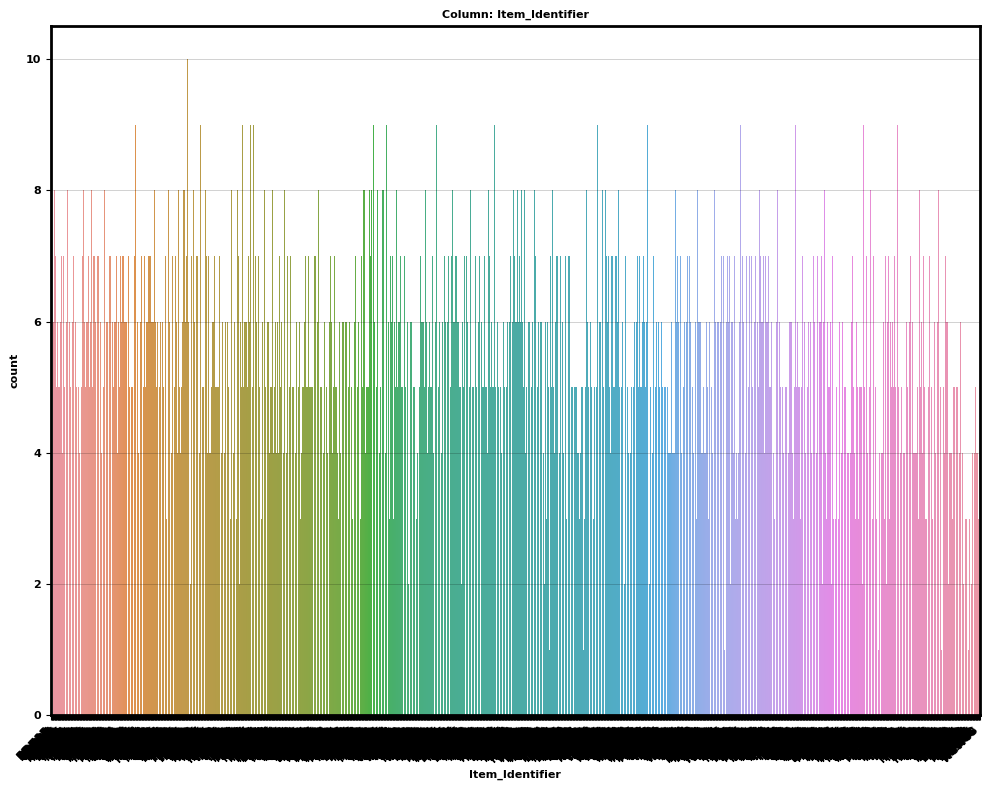

- NaN's Found: 0 (0.0%)
- Unique Values: 1559
- Most common value: 'FDW13' occurs 10 times (0.12%)
- Not constant or quasi-constant.


In [510]:
# Calling our custom EDA function
explore_categorical(df_psales, of1);

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
- Categorical

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
- There are 0 null values.

3. Is the feature constant or quasi-constant?
- Neither.

4. What is the cardinality? Is it high (>10)?
- High cardinality.

5. Would we know this feature before the target is determined?
- Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
- No business reason.

Create multivariate plot

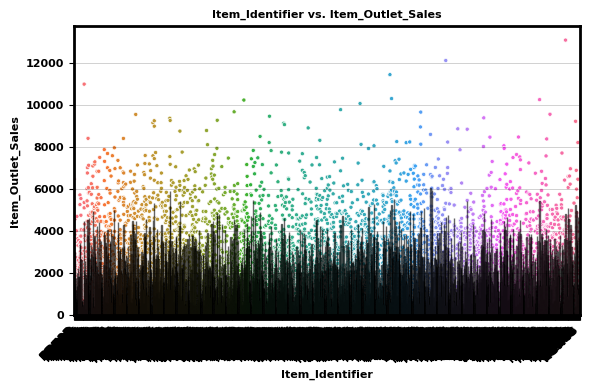

In [511]:
plot_categorical_vs_target(df_psales, of1);

1. Based on your business understanding, would you expect this feature to be a predictor of the target?
 - No. I wouldn't expect this to be a predictor of the target

2. Does this feature appear to be a predictor of the target?
 - No, it appears that it does not.

### Item_Fat_Content
Definition: Whether the product is low-fat or regular
               

In [512]:
## Define a variable to identify the feature
## Display the features datatype
of2 = "Item_Fat_Content"
df_psales[of2].dtype

dtype('O')

Create univariate plot

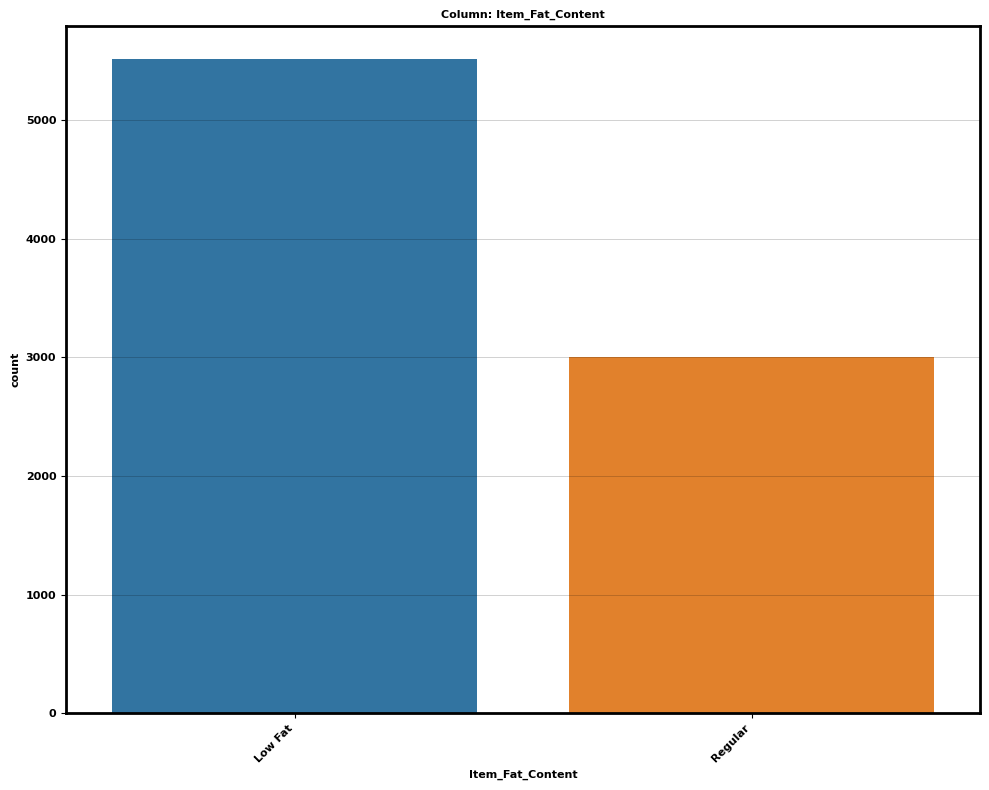

- NaN's Found: 0 (0.0%)
- Unique Values: 2
- Most common value: 'Low Fat' occurs 5517 times (64.73%)
- Not constant or quasi-constant.


In [513]:
# Calling our custom EDA function
explore_categorical(df_psales, of2);

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
- Categorical

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
- There are 0 null values.

3. Is the feature constant or quasi-constant?
- Neither.

4. What is the cardinality? Is it high (>10)?
- Low cardinality.

5. Would we know this feature before the target is determined?
- Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
- No business reason.

Create multivariate plot

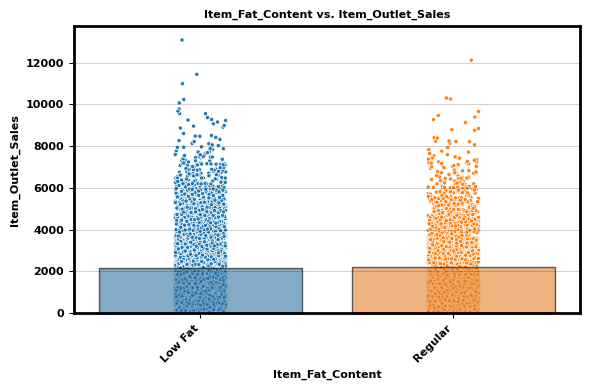

In [514]:
#Create multivariate plot for of2
plot_categorical_vs_target(df_psales, of2);

1. Based on your business understanding, would you expect this feature to be a predictor of the target?
 - Yes. I would expect the fat content to impact outlook sales, depending on customer preferences.

2. Does this feature appear to be a predictor of the target?
 - There appears to be some relationshipship, but they are pretty evenly split. There may be other factors that better influence sales.  

### Item_Type
Definition: The category to which the product belongs

Create univariate exploration:


In [515]:
## Define a variable to identify the feature
## Display the features datatype
of3 = "Item_Type"
df_psales[of3].dtype

dtype('O')

Create a univariate visualization:

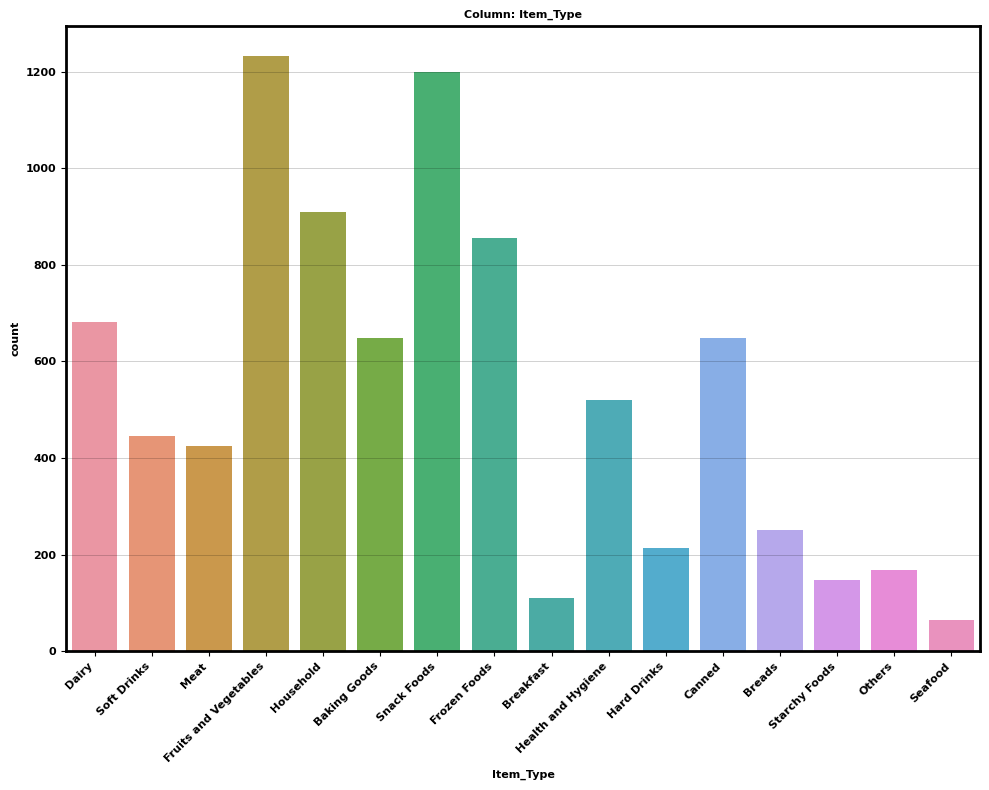

- NaN's Found: 0 (0.0%)
- Unique Values: 16
- Most common value: 'Fruits and Vegetables' occurs 1232 times (14.46%)
- Not constant or quasi-constant.


In [516]:
# Calling our custom EDA function
explore_categorical(df_psales, of3);

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
- Categorical

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
- There are 0 null values.

3. Is the feature constant or quasi-constant?
- Neither.

4. What is the cardinality? Is it high (>10)?
- High cardinality (16).

5. Would we know this feature before the target is determined?
- Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
- No business reason.

Create a multivariate visualization:

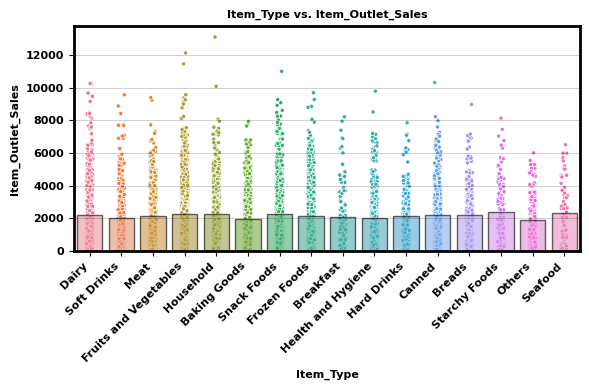

In [517]:
##Create mulivariate plot again sales
plot_categorical_vs_target(df_psales, of3,'Item_Outlet_Sales');

1. Based on your business understanding, would you expect this feature to be a predictor of the target?
 - Yes. I expect item type to impact sales.  

2. Does this feature appear to be a predictor of the target?
 - Maybe, there isn't a lot of variability in terms of means or on the range of values, but there is some.

### Outlet_Identifier
Definition: 	Store ID

In [518]:
## Define a variable to identify the feature
## Display the features datatype
of4 = "Outlet_Identifier"
df_psales[of4].dtype

dtype('O')

Create univariate exploration:

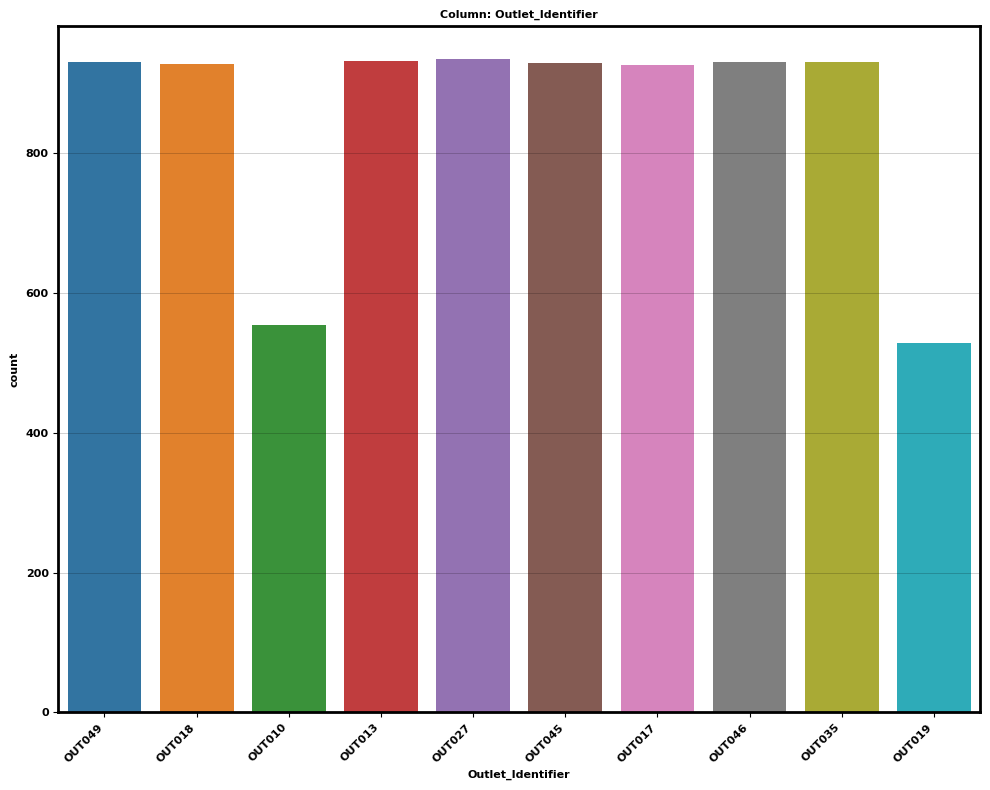

- NaN's Found: 0 (0.0%)
- Unique Values: 10
- Most common value: 'OUT027' occurs 935 times (10.97%)
- Not constant or quasi-constant.


In [519]:
# Calling our custom EDA function
explore_categorical(df_psales, of4);

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
- Categorical

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
- There are 0 null values.

3. Is the feature constant or quasi-constant?
- Neither.

4. What is the cardinality? Is it high (>10)?
- Med-High cardinality (10).

5. Would we know this feature before the target is determined?
- Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
- No business reason.

Create a multivariate visualization:

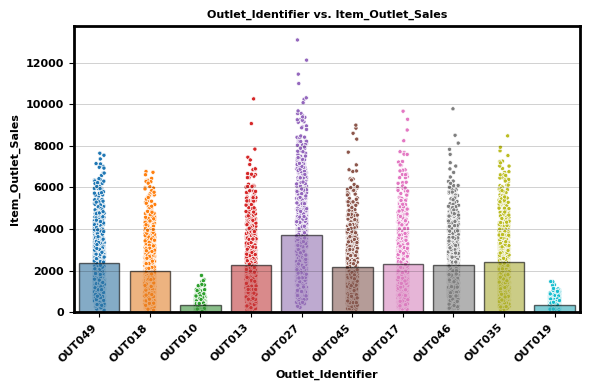

In [520]:
##Create mulivariate plot again sales
plot_categorical_vs_target(df_psales, of4);

1. Based on your business understanding, would you expect this feature to be a predictor of the target?
 - No. I wouldn't think this is a strong indicator of outlet sales.

2. Does this feature appear to be a predictor of the target?
 - Yes. Some stores perform better than others, so there seems to be some impact of average outlet sales.

### Outlet_Size
Definition: The size of the store in terms of ground area covered

Define the variable


In [521]:
## Define a variable to identify the feature
## Display the features datatype
of5 = "Outlet_Size"
df_psales[of5].dtype

dtype('O')

Create a univarite model:

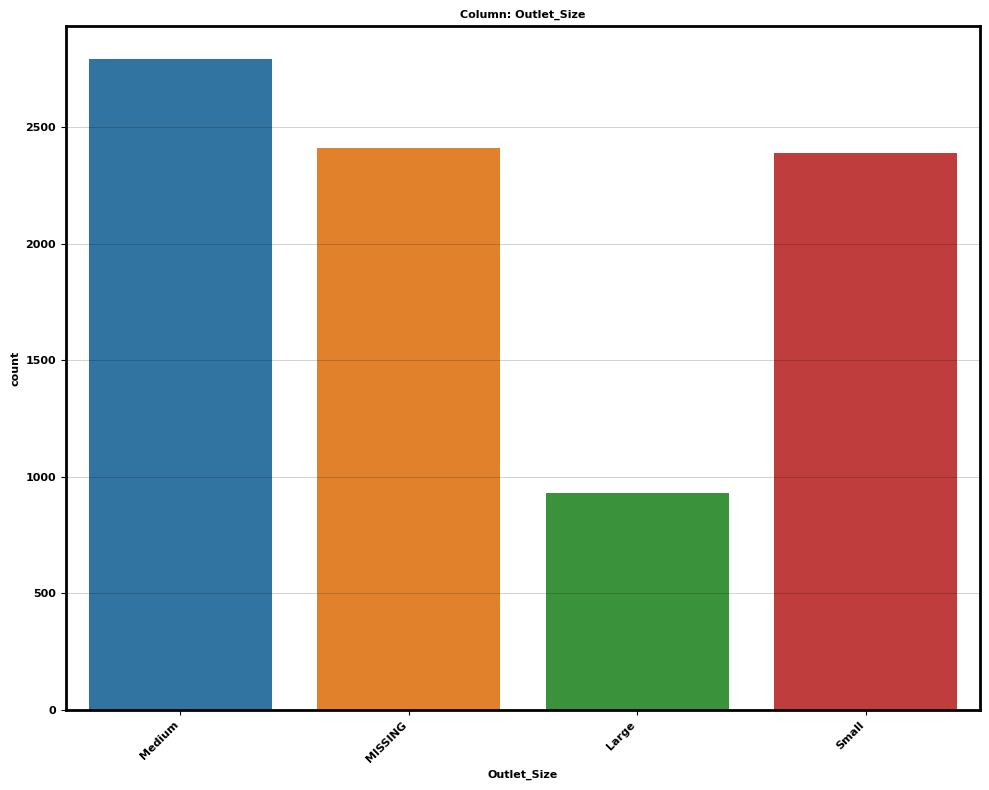

- NaN's Found: 2410 (28.28%)
- Unique Values: 4
- Most common value: 'Medium' occurs 2793 times (32.77%)
- Not constant or quasi-constant.


In [522]:
# Calling our custom EDA function
explore_categorical(df_psales, of5);

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
- Categorical

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
- There are 2410 null values (28.28%). I'd recommend we impute the missing objects with the median value.  

3. Is the feature constant or quasi-constant?
- Neither.

4. What is the cardinality? Is it high (>10)?
- Low cardinality.

5. Would we know this feature before the target is determined?
- Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
- No business reason.

Create multivariate plot:

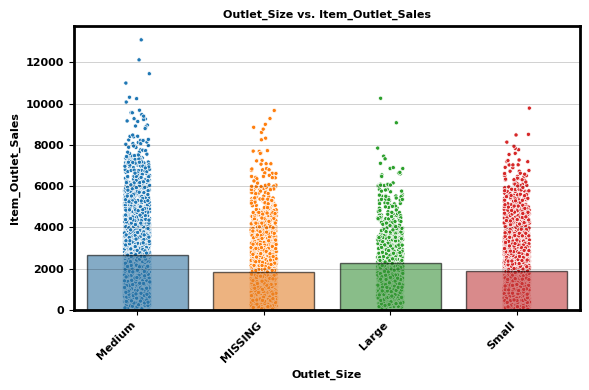

In [523]:
##Create mulivariate plot again sales
plot_categorical_vs_target(df_psales, of5);

1. Based on your business understanding, would you expect this feature to be a predictor of the target?
 - No. There doesn't seem to be a predictable variation across sales.

2. Does this feature appear to be a predictor of the target?
 - It doesn't appear so, but it's difficult to tell with such a large number of missing values.

### Outlet_Location_Type
Definition: The type of area in which the store is located

Define the variable


In [524]:
## Define a variable to identify the feature
## Display the features datatype
of6 = "Outlet_Location_Type"
df_psales[of6].dtype

dtype('O')

Create a univarite model:

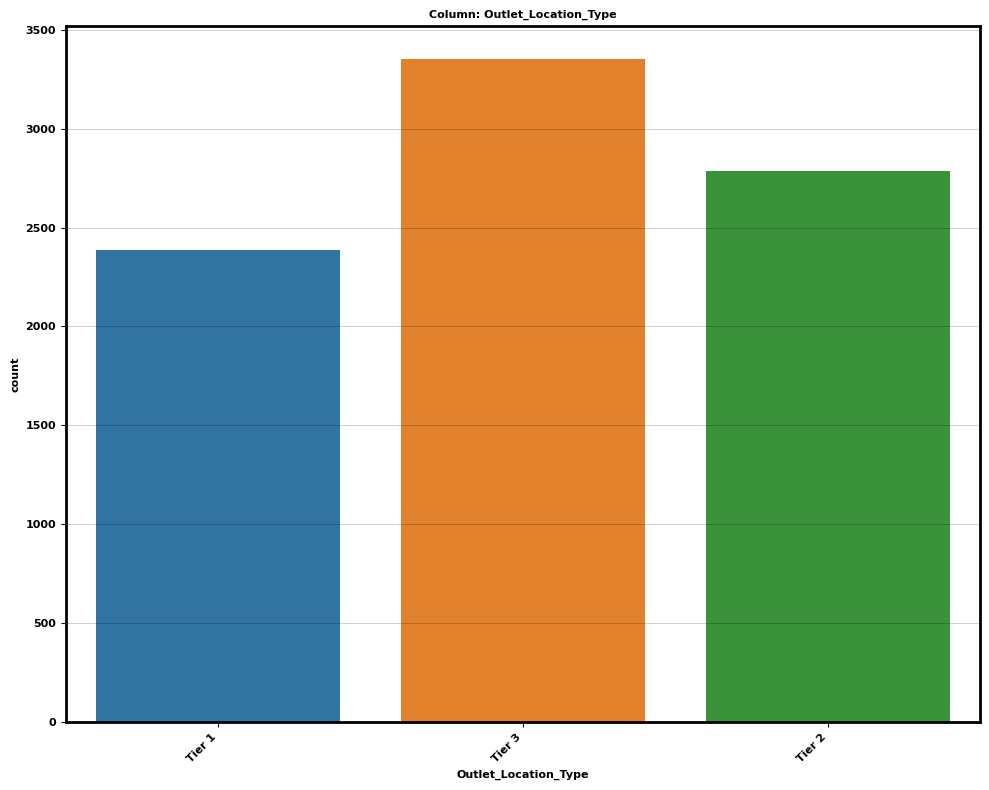

- NaN's Found: 0 (0.0%)
- Unique Values: 3
- Most common value: 'Tier 3' occurs 3350 times (39.31%)
- Not constant or quasi-constant.


In [525]:
# Calling our custom EDA function
explore_categorical(df_psales, of6);

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
- Ordinal

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
- There are 0 null values.

3. Is the feature constant or quasi-constant?
- Neither.

4. What is the cardinality? Is it high (>10)?
- Low cardinality.

5. Would we know this feature before the target is determined?
- Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
- No business reason.

Create multivariate plot:

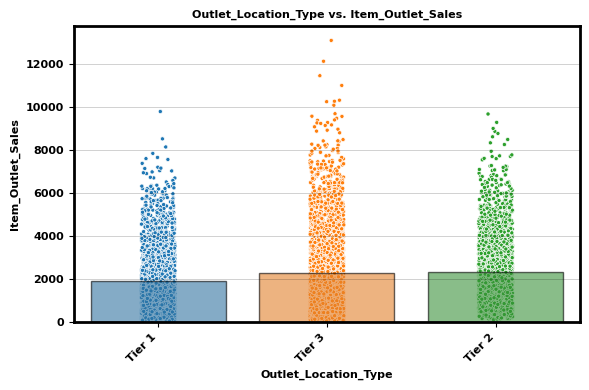

In [526]:
##Create mulivariate plot again sales
plot_categorical_vs_target(df_psales, of6);

1. Based on your business understanding, would you expect this feature to be a predictor of the target?
 - Yes. Location does seem to have a impact on the mean Sales values.

2. Does this feature appear to be a predictor of the target?
 - Yes. It appears the group means increase as you move up in tiers.

### Outlet_Type
Definition: The type of area in which the store is located

Define the variable


In [527]:
## Define a variable to identify the feature
## Display the features datatype
of7 = "Outlet_Type"
df_psales[of7].dtype

dtype('O')

Create a univarite model:

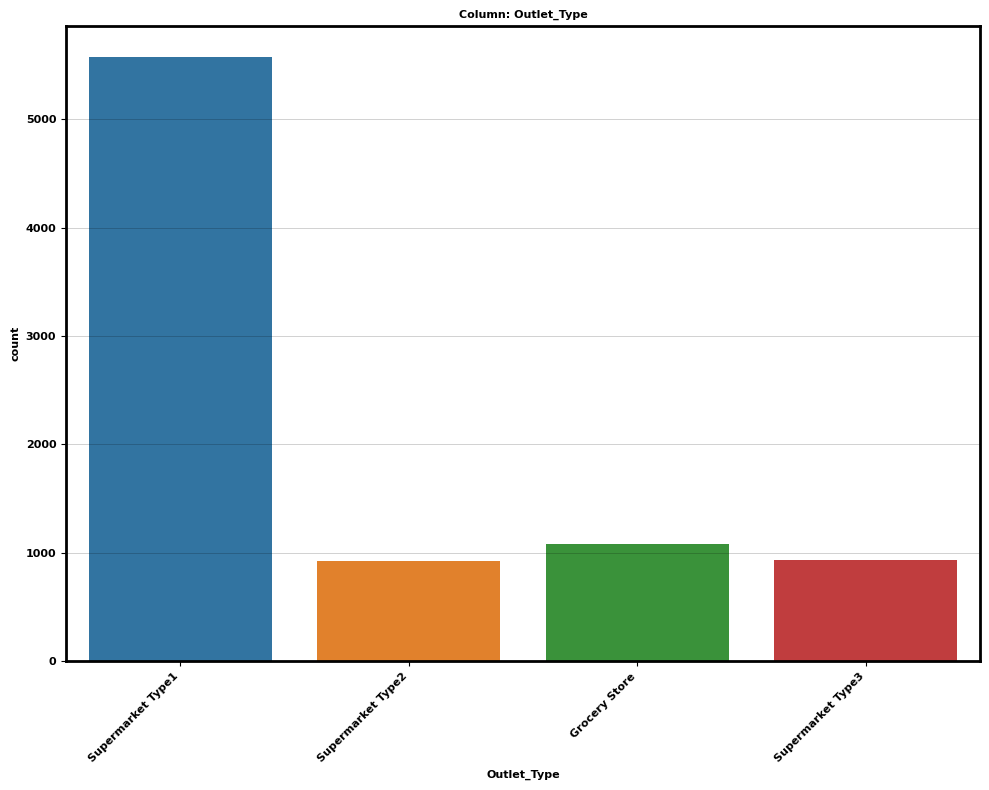

- NaN's Found: 0 (0.0%)
- Unique Values: 4
- Most common value: 'Supermarket Type1' occurs 5577 times (65.43%)
- Not constant or quasi-constant.


In [528]:
# Calling our custom EDA function
explore_categorical(df_psales, of7);

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
- Categorical (Nominal)

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
- There are 0 null valuees.

3. Is the feature constant or quasi-constant?
- Neither.

4. What is the cardinality? Is it high (>10)?
- Low cardinality.

5. Would we know this feature before the target is determined?
- Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
- No business reason.

Create multivariate plot:

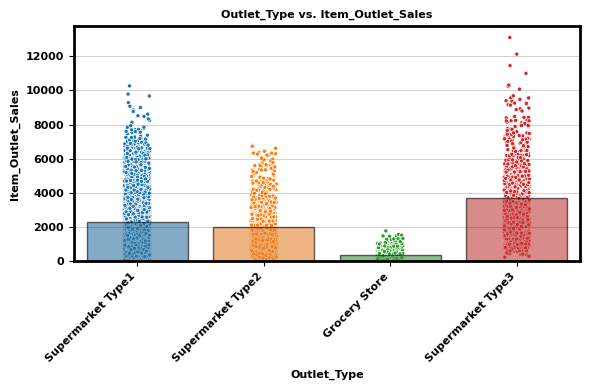

In [529]:
##Create mulivariate plot again sales
plot_categorical_vs_target(df_psales, of7);

1. Based on your business understanding, would you expect this feature to be a predictor of the target?
 - Yes. I would expect outlet type to impact the mean sales.

2. Does this feature appear to be a predictor of the target?
 - Yes. It appears the group means appears the type of supermarket has an impact on the mean sales.

## Numerical Features

### Item_Weight
Definition:  Weight of product

Define the variable

In [530]:
## Define a variable to identify the feature
## Display the features datatype
nf1 = "Item_Weight"
df_psales[nf1].dtype

dtype('float64')

Create univariate model:

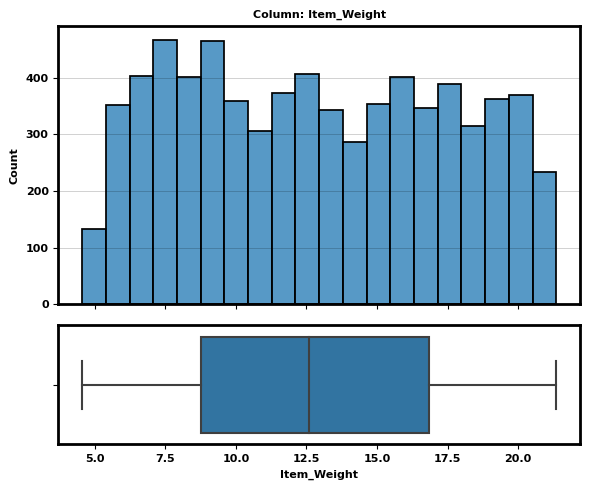

- NaN's Found: 1463 (17.17%)
- Unique Values: 415
- Most common value: 'nan' occurs 1463 times (17.17%)
- Not constant or quasi-constant.


In [531]:
explore_numeric(df_psales, nf1);

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
- Numeric

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
- There are 1463 (17.17%) null values.

3. Is the feature constant or quasi-constant?
- Neither.

4. What is the cardinality? Is it high (>10)?
- High cardinality.

5. Would we know this feature before the target is determined?
- Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
- No business reason.

Create multivariate visualization:`

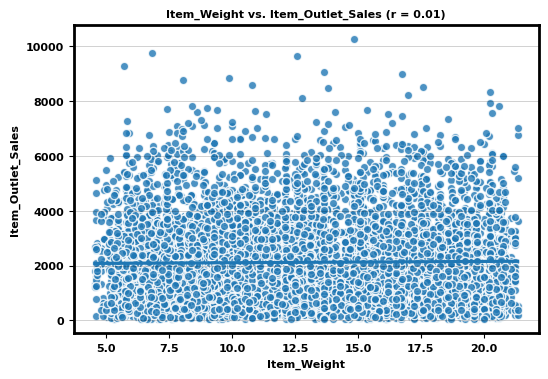

In [532]:
#Create multivariate plot
plot_numeric_vs_target(df_psales, x=nf1);

1. Based on your business understanding, would you expect this feature to be a predictor of the target?
 - Maybe a slight impact on outlet sales.

2. Does this feature appear to be a predictor of the target?
 - No. The impact is very low. The R value is .01.

### Item_Visibility
Definition: The percentage of total display area of all products in a store allocated to the particular product

Define the variable

In [533]:
## Define a variable to identify the feature
## Display the features datatype
nf2 = "Item_Visibility"
df_psales[nf2].dtype

dtype('float64')

Create univariate model:

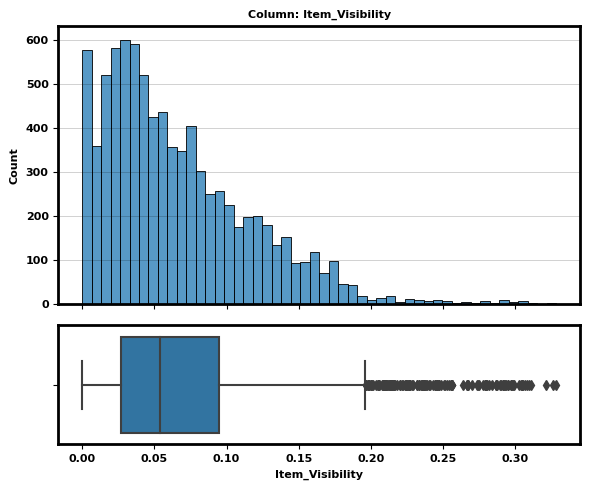

- NaN's Found: 0 (0.0%)
- Unique Values: 7880
- Most common value: '0.0' occurs 526 times (6.17%)
- Not constant or quasi-constant.


In [534]:
explore_numeric(df_psales, nf2);

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
- Numeric

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
- There are 0 null values.

3. Is the feature constant or quasi-constant?
- Neither.

4. What is the cardinality? Is it high (>10)?
- High cardinality.

5. Would we know this feature before the target is determined?
- Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
- No business reason.

Create multivariate visualization:`

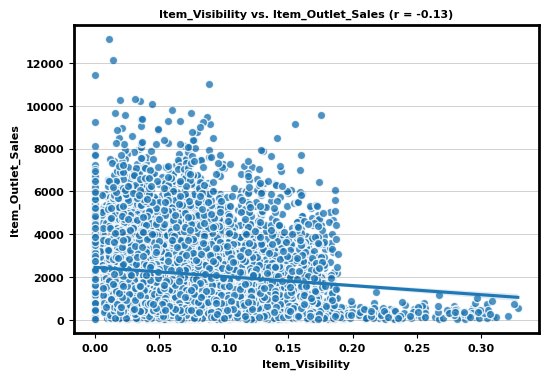

In [535]:
#Create multivariate plot
plot_numeric_vs_target(df_psales, x=nf2);

1. Based on your business understanding, would you expect this feature to be a predictor of the target?
 - Yes. I would assume that item visibility would impact overall sales.

2. Does this feature appear to be a predictor of the target?
 - No. The impact is very low. The R value is -.13.

### Item_MRP
Definition: Maximum Retail Price (list price) of the product


Define the variable

In [536]:
## Define a variable to identify the feature
## Display the features datatype
nf3 = "Item_MRP"
df_psales[nf3].dtype

dtype('float64')

Create univariate model:

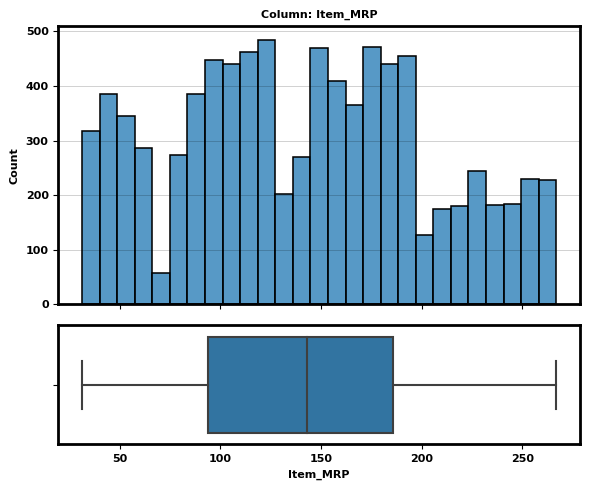

- NaN's Found: 0 (0.0%)
- Unique Values: 5938
- Most common value: '172.0422' occurs 7 times (0.08%)
- Not constant or quasi-constant.


In [537]:
explore_numeric(df_psales, nf3);

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
- Numeric

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
- There are 0 null values.

3. Is the feature constant or quasi-constant?
- Neither.

4. What is the cardinality? Is it high (>10)?
- High cardinality.

5. Would we know this feature before the target is determined?
- Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
- No business reason.

Create multivariate visualization:`

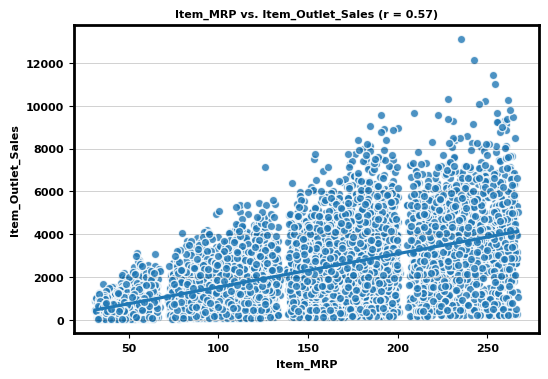

In [538]:
#Create multivariate plot
plot_numeric_vs_target(df_psales, x=nf3);

1. Based on your business understanding, would you expect this feature to be a predictor of the target?
 - Yes. I would assume that item price would impact overall sales.

2. Does this feature appear to be a predictor of the target?
 - Yes. There is a moderate correlation between these two values (r=.57). As MRP increases, the range of outlet sales increases.

### Outlet_Establishment_Year
Definition: The year in which store was established


Define the variable

In [539]:
## Define a variable to identify the feature
## Display the features datatype
nf4 = "Outlet_Establishment_Year"
df_psales[nf4].dtype

dtype('int64')

Create univariate model:

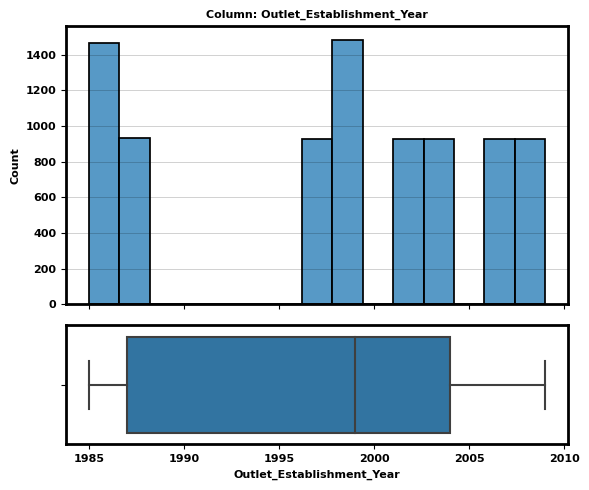

- NaN's Found: 0 (0.0%)
- Unique Values: 9
- Most common value: '1985' occurs 1463 times (17.17%)
- Not constant or quasi-constant.


In [540]:
explore_numeric(df_psales, nf4);

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
- Numeric

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
- There are 0 null values.

3. Is the feature constant or quasi-constant?
- Neither.

4. What is the cardinality? Is it high (>10)?
- Low cardinality with a value of 8.

5. Would we know this feature before the target is determined?
- Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
- No business reason.

Create multivariate visualization:`

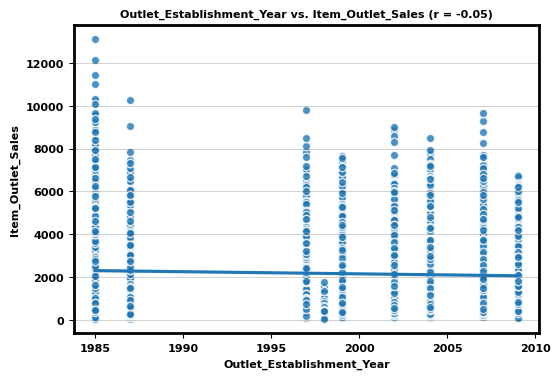

In [541]:
#Create multivariate plot
plot_numeric_vs_target(df_psales, x=nf4);

1. Based on your business understanding, would you expect this feature to be a predictor of the target?
 - Maybe, new stores could have higher sales, if they get more customer traffic,

2. Does this feature appear to be a predictor of the target?
 - No. The values are pretty evenly distributed. The correlation is very low (r=-.05).